In [3]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/rerkki/data-analytics-ml/refs/heads/main/datasets/Student_Performance.csv", encoding='latin-1')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Preparation
First, convert the 'Extracurricular Activities' column into numerical format (0 for 'No', 1 for 'Yes') using `map` function. Then, define the independent variables (features) and the dependent variable (target).

In [5]:
# Convert 'Extracurricular Activities' to numerical (0/1)
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'No': 0, 'Yes': 1})

# Define independent variables (X) and dependent variable (y)
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

print("Features (X) head:")
display(X.head())
print("\nTarget (y) head:")
display(y.head())

Features (X) head:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5



Target (y) head:


,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


### 2. Splitting the Data
Split the dataset into training and testing sets to evaluate the model's performance on unseen data. Use 80% of the data for training and 20% for testing.

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (8000, 5), (8000,)
Testing set shape: (2000, 5), (2000,)


### 3. Building and Training the Multiple Linear Regression Model
Next, create and train a Linear Regression model using the training data.

In [7]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


### 4. Evaluating the Model
Finally, evaluate the model's performance on the test set using metrics like Mean Squared Error (MSE) and R-squared (R2).

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Display model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
display(coefficients)
print(f"Intercept: {model.intercept_:.2f}")

Mean Squared Error (MSE): 4.08
R-squared (R2): 0.99


,Feature,Coefficient
0,Hours Studied,2.852484
1,Previous Scores,1.016988
2,Extracurricular Activities,0.608617
3,Sleep Hours,0.476941
4,Sample Question Papers Practiced,0.191831


Intercept: -33.92


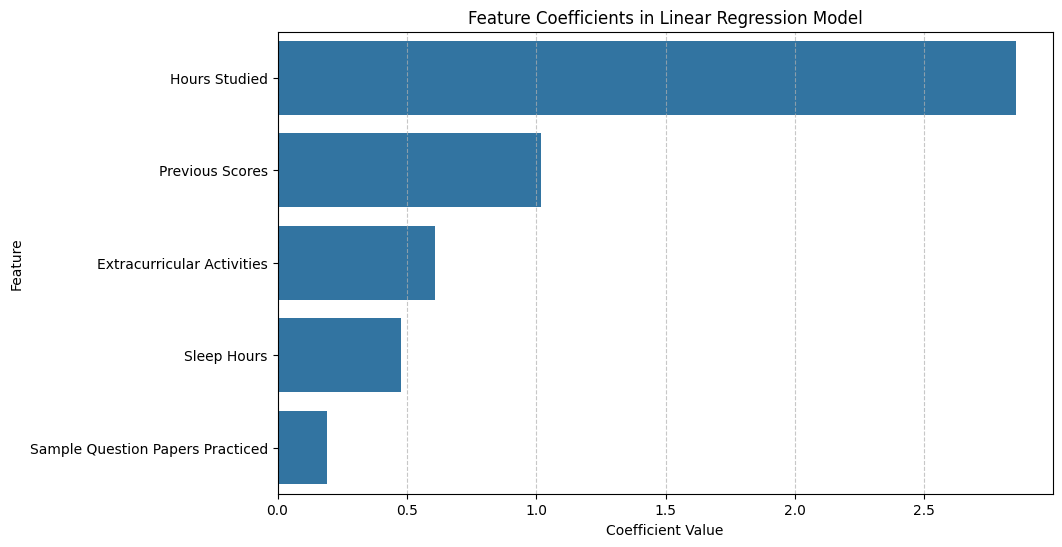

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.sort_values(by='Coefficient', ascending=False))
plt.title('Feature Coefficients in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### 5. Visualizing Predictions
Visualize the actual vs. predicted values to see how well our model performs.

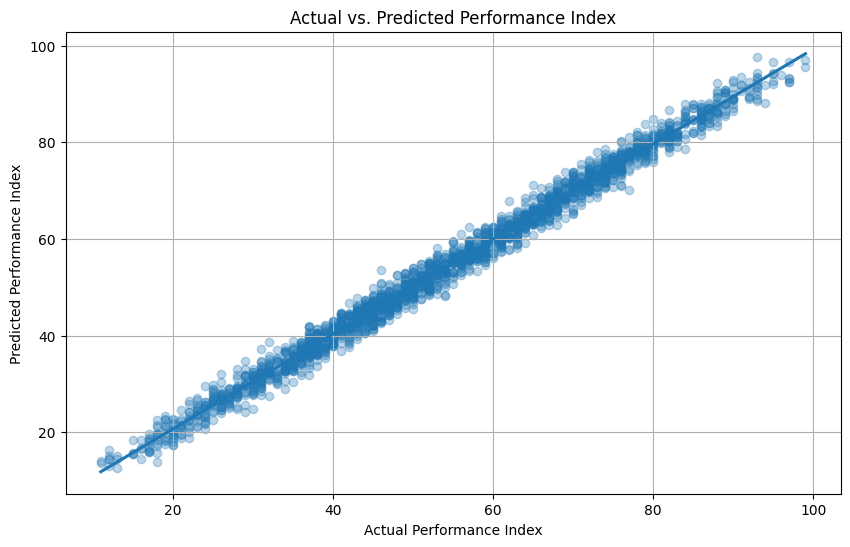

In [9]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3})
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs. Predicted Performance Index')
plt.grid(True)
plt.show()